Добиться хорошего результата от модели, собранной на занятии (5 угаданныx картинок из 8 предложенных). Варианты изменений:
- изменение слоёв и их количества;
- изменение метода оптимизации;
- изменение процесса обучения;

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import optim
import torch.nn.functional as F
from tqdm import tqdm
from torch import nn

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transform, 
                                             download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32])
1


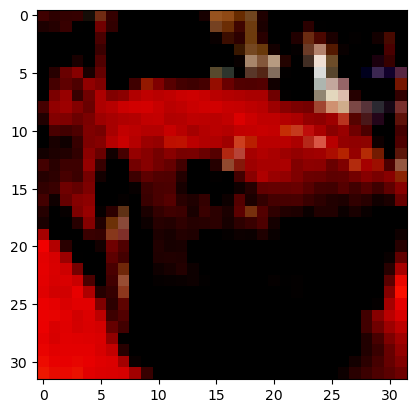

In [3]:
image, label = train_dataset[5]
print (image.size())
print (label)
plt.imshow(image.permute(1, 2, 0).numpy())

In [4]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.05)
        x = self.fc4(x)
        return x
    
net = Net(3072, 500, 10)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
net.train()

for epoch in tqdm(range(20)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

[1,     1] loss: 0.001
[1,   301] loss: 0.341
[1,   601] loss: 0.322


  5%|████▏                                                                              | 1/20 [00:31<09:52, 31.21s/it]

[2,     1] loss: 0.001
[2,   301] loss: 0.289
[2,   601] loss: 0.276


 10%|████████▎                                                                          | 2/20 [00:58<08:43, 29.08s/it]

[3,     1] loss: 0.001
[3,   301] loss: 0.260
[3,   601] loss: 0.254


 15%|████████████▍                                                                      | 3/20 [01:30<08:32, 30.13s/it]

[4,     1] loss: 0.001
[4,   301] loss: 0.243
[4,   601] loss: 0.240


 20%|████████████████▌                                                                  | 4/20 [02:00<08:06, 30.38s/it]

[5,     1] loss: 0.001
[5,   301] loss: 0.231
[5,   601] loss: 0.228


 25%|████████████████████▊                                                              | 5/20 [02:32<07:39, 30.66s/it]

[6,     1] loss: 0.001
[6,   301] loss: 0.219
[6,   601] loss: 0.218


 30%|████████████████████████▉                                                          | 6/20 [03:03<07:10, 30.78s/it]

[7,     1] loss: 0.001
[7,   301] loss: 0.209
[7,   601] loss: 0.208


 35%|█████████████████████████████                                                      | 7/20 [03:34<06:42, 30.97s/it]

[8,     1] loss: 0.001
[8,   301] loss: 0.201
[8,   601] loss: 0.201


 40%|█████████████████████████████████▏                                                 | 8/20 [04:04<06:09, 30.79s/it]

[9,     1] loss: 0.001
[9,   301] loss: 0.191
[9,   601] loss: 0.193


 45%|█████████████████████████████████████▎                                             | 9/20 [04:35<05:38, 30.79s/it]

[10,     1] loss: 0.001
[10,   301] loss: 0.184
[10,   601] loss: 0.185


 50%|█████████████████████████████████████████                                         | 10/20 [05:06<05:09, 30.93s/it]

[11,     1] loss: 0.001
[11,   301] loss: 0.178
[11,   601] loss: 0.178


 55%|█████████████████████████████████████████████                                     | 11/20 [05:37<04:38, 30.92s/it]

[12,     1] loss: 0.001
[12,   301] loss: 0.171
[12,   601] loss: 0.171


 60%|█████████████████████████████████████████████████▏                                | 12/20 [06:09<04:08, 31.04s/it]

[13,     1] loss: 0.001
[13,   301] loss: 0.163
[13,   601] loss: 0.164


 65%|█████████████████████████████████████████████████████▎                            | 13/20 [06:39<03:36, 30.95s/it]

[14,     1] loss: 0.001
[14,   301] loss: 0.157
[14,   601] loss: 0.158


 70%|█████████████████████████████████████████████████████████▍                        | 14/20 [07:10<03:05, 30.93s/it]

[15,     1] loss: 0.000
[15,   301] loss: 0.149
[15,   601] loss: 0.153


 75%|█████████████████████████████████████████████████████████████▌                    | 15/20 [07:41<02:34, 30.95s/it]

[16,     1] loss: 0.001
[16,   301] loss: 0.143
[16,   601] loss: 0.147


 80%|█████████████████████████████████████████████████████████████████▌                | 16/20 [08:12<02:03, 30.92s/it]

[17,     1] loss: 0.000
[17,   301] loss: 0.135
[17,   601] loss: 0.140


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [08:43<01:33, 31.00s/it]

[18,     1] loss: 0.000
[18,   301] loss: 0.129
[18,   601] loss: 0.135


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [09:15<01:02, 31.11s/it]

[19,     1] loss: 0.000
[19,   301] loss: 0.121
[19,   601] loss: 0.128


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [09:46<00:31, 31.13s/it]

[20,     1] loss: 0.000
[20,   301] loss: 0.116
[20,   601] loss: 0.122


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [10:17<00:00, 30.86s/it]

Training is finished!


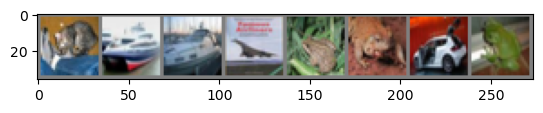

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog 
Predicted:  cat   ship  plane plane deer  frog  car   frog 


In [8]:
net.eval()

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(test_loader)
images, labels = next(dataiter)

outputs = net(images)
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(8)))

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [10]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 63.3 %
Accuracy for class: car   is 65.3 %
Accuracy for class: bird  is 48.1 %
Accuracy for class: cat   is 30.5 %
Accuracy for class: deer  is 49.6 %
Accuracy for class: dog   is 39.1 %
Accuracy for class: frog  is 67.0 %
Accuracy for class: horse is 53.9 %
Accuracy for class: ship  is 67.0 %
Accuracy for class: truck is 55.6 %


Переписать данный туториал на PyTorch: https://www.tensorflow.org/tutorials/quickstart/beginner?hl=ru

In [44]:
train_dataset_mnist = torchvision.datasets.MNIST(root='data_mnist/',
                                                 train = True,
                                                 transform=transforms.ToTensor(),
                                                 download=True)
train_loader_mnist = torch.utils.data.DataLoader(dataset=train_dataset_mnist,
                                                 batch_size=256, 
                                                 shuffle=True)

test_dataset_mnist = torchvision.datasets.MNIST(root='data_mnist/',
                                                 train = False,
                                                 transform=transforms.ToTensor(),
                                                 download=True)
test_loader_mnist = torch.utils.data.DataLoader(dataset=test_dataset_mnist,
                                                 batch_size=256, 
                                                 shuffle=True)

In [121]:
class NetMNIST(nn.Module):
    def __init__(self):
        super(NetMNIST, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.mpool = nn.MaxPool2d(2)
        self.dropout1 = nn.Dropout(0.2)
        self.fc1 = nn.Linear(9216, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.mpool(x)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=-1)

net1 = NetMNIST()

In [77]:
net1

NetMNIST(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (mpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=3072, out_features=48, bias=True)
  (fc2): Linear(in_features=48, out_features=10, bias=True)
)

In [47]:
optimizer1 = torch.optim.Adam(net1.parameters(), lr = 0.01)
criterion1 = nn.CrossEntropyLoss() 

In [122]:
net1.train()

for epoch in tqdm(range(5)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader_mnist, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net1(inputs)
        loss = criterion1(outputs, labels)
        loss.backward()
        optimizer1.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 100 == 0:    
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Training is finished!')

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

[1,     1] loss: 0.023
[1,   101] loss: 2.308
[1,   201] loss: 2.308


 20%|████████████████▊                                                                   | 1/5 [00:38<02:35, 38.99s/it]

[2,     1] loss: 0.023
[2,   101] loss: 2.307
[2,   201] loss: 2.307


 40%|█████████████████████████████████▌                                                  | 2/5 [01:17<01:56, 38.76s/it]

[3,     1] loss: 0.023
[3,   101] loss: 2.308
[3,   201] loss: 2.307


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [01:56<01:17, 38.78s/it]

[4,     1] loss: 0.023
[4,   101] loss: 2.307
[4,   201] loss: 2.308


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [02:35<00:39, 39.02s/it]

[5,     1] loss: 0.023
[5,   101] loss: 2.307
[5,   201] loss: 2.307


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:14<00:00, 38.96s/it]

Training is finished!


In [129]:
net1.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader_mnist:
        images, labels = data
        outputs = net1(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 10 %
